<h2>Helper Notebook for Creating Code Flow Data</h2>

In [38]:
# REYeker lib
import modules.rEYEkerAnalysis as rEYEker

# lib for dataframes
import pandas as pd

import numpy as np

# lib for plotting
from matplotlib import pyplot as plt

# lib for crerating paths
from pathlib import Path

import random

In [39]:
def draw_lines(sheet_config, width):
    height_of_line = sheet_config.loc[1]['stop'] - sheet_config.loc[1]['start']
    
    for idx, val in sheet_config.iterrows():
        plt.text(0, val['start']+height_of_line/2, str(idx))
        plt.plot([0, width], [val['start'], val['start']], color='grey')
        
def draw_heat(img, aoi_mask, aoi_colors):
    for height in range(img.shape[0]):
        for width in range(img.shape[1]):
            if aoi_mask[height, width] == 0:
                break
            img[height, width] = 0.4 * img[height, width] + 0.6 * aoi_colors[aoi_mask[height, width]]

<h3>Config</h3>

In [269]:
algo = "Multiples"

image_path = 'images/' + algo + '.png'

#path for line sheet
sheet_path = './data/code_flow/'+ algo + '.xlsx'

#name for excel file saved in ./data/code_flow folder
save_as = 'AOI_' + algo


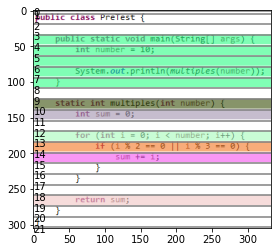

In [276]:
sheet_config = pd.read_excel(sheet_path, sheet_name="config")


img = rEYEker.load_image(image_path)
aoi_mask = np.zeros((img.shape[0], img.shape[1])).astype(int)

# commonChars: none, main, definition, pre calculation, if condition, if step,iteration condition, iteration step, return result

aoi_regions = [ #line, name
    (-1, "none"),

    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),

    (9, "definition"),
    (10, "pre calculation"),

    (12, "iteration condition"),
    (13, "if condition"),
    (14, "if step"),
    
    (18, "return result"),
]

aoi_names = list(dict.fromkeys([name for (line, name) in aoi_regions]))

for region in aoi_regions:
    if region[0] == -1:
        continue
    aoi_mask[sheet_config.loc[region[0]]['start']:sheet_config.loc[region[0]]['stop'], :] = aoi_names.index(region[1])

aoi_colors = [np.array([1.0, 1.0, 1.0])]

for i in range(np.amax(aoi_mask)):
    aoi_colors.append(np.array([random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)]))  

draw_heat(img, aoi_mask, aoi_colors)
draw_lines(sheet_config, img.shape[1])

plt.imshow(img);

#1
CommonChars
aoi_regions = [
    #line, name
    (-1, "none"),
    
    (2, "main"),
    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),
    (8, "main"),
    
    (10, "definition"),
    (11, "pre calculation"),    
    
    (12, "if condition"),
    (13, "if step"),
    (14, "if condition"),
    (15, "if step"),
    
    (17, "pre calculation"),
    
    (19, "iteration condition"),
    
    (20, "if condition"),
    (21, "if step"),
    
    (24, "return result"),  
]

#2
ContainsSubstring
aoi_regions = [
    #line, name
    (-1, "none"),
    
    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),
    
    (9, "definition"),
    (10, "iteration condition"),
    (11, "iteration condition"),
    
    (12, "if condition"),
    (13, "if step"),
    
    (14, "if condition"),
    (15, "if step"),
    
    (16, "if condition"),
    (17, "if condition"),
    
    (18, "return result"),
    
    (23, "return result"),
]

#3
CountVowels
aoi_regions = [ 
    #line, name
    (-1, "none"),

    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),

    (9, "definition"),

    (10, "pre calculation"),
    (11, "pre calculation"),

    (13, "iteration condiiton"),
    (14, "iteration condition"),

    (15, "if condition"),
    (16, "if step"),

    (21, "return result"),
]


#4
ReverseArray
aoi_regions = [ 
    #line, name
    (-1, "none"),

    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),
    (8, "main"),
    (9, "main"),
    (10, "main"),
    (11, "main"),
    (12, "main"),

    (14, "definition"),

    (16, "iteration condition"),
    (17, "iteration step"),
    (18, "iteration step"),
    (19, "iteration step"),

    (22, "return result"),
]

#5
BinarySearchStrings
aoi_regions = [ #line, name
    (-1, "none"),

    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),
    (8, "main"), 

    (10, "definition"),
    (11, "pre calculation"),

    (12, "iteration condition"),
    (13, "iteration step"),

    (15, "iteration step"),
    
    (17, "if condition"),
    (18, "return result"),
    
    (21, "if condition"),
    (22, "if step"),
    
    (24, "if condition"),
    (25, "if step"),
    
    (28, "return result"),
]

#6 
Multiples
aoi_regions = [ #line, name
    (-1, "none"),

    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),

    (9, "definition"),
    (10, "pre calculation"),

    (12, "iteration condition"),
    (13, "if condition"),
    (14, "if step"),
    
    (18, "return result"),
]

#7
CrossSum
aoi_regions = [
    #line, name
    (-1, "none"),
    
    (2, "main"),
    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    
    (8, "definition"),
    (9, "pre calculation"),
    
    (11, "iteration condition"),
    (12, "iteration step"),
    (13, "iteration step"),
    
    (16, "return result"),
]

#8
Swap
aoi_regions = [
    #line, name
    (-1, "none"),
    
    (2, "main"),
    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    
    (8, "definition"),
    
    (9, "pre calculation"),
    (10, "pre calculation"),
    (11, "pre calculation"),
    (12, "pre calculation"),
    
    (13, "return result"),
]

#9
InsertionSort
aoi_regions = [
    #line, name
    (-1, "none"),
    
    (2, "main"),
    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),
    (8, "main"),
    (9, "main"),
    (10, "main"),
    (11, "main"),
    
    (13, "definition"),
    
    (14, "pre calculation"),
    
    (15, "iteration condition"),
    (16, "iteration step"),
    (17, "iteration step"),
    
    (18, "iteration condition"),
    (19, "iteration step"),
    (20, "iteration step"),
    
    (22, "iteration step"),
    
    (24, "return result"),
]

#10
GreatestCommonDivisor
aoi_regions = [
    #line, name
    (-1, "none"),
    
    (2, "main"),
    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),
    
    (9, "definition"),
    (10, "pre calculation"),
    
    (12, "iteration condition"),
    (13, "if condition"),
    (14, "if step"),
    (15, "if step"),
    (16, "if step"),
    
    (18, "iteration step"),
    
    (19, "if condition"),
    (20, "if step"),
    (21, "if step"),
    
    (23, "iteration condition"),
    
    (25, "return result"),  
]

save Data to Excel

In [277]:
cols = ["startHeight", "stopHeight", "startWidth", "stopWidth", "Name"]
tmp_list = []
for region in aoi_regions:
    if region[0] == -1:
        continue
    tmp_list.append([sheet_config.loc[region[0]]['start'], sheet_config.loc[region[0]]['stop'],0, img.shape[1], region[1]])
    
df_config = pd.DataFrame(tmp_list, columns=cols)

folder = "./data/aoi_categorized/"
Path(folder).mkdir(parents=True, exist_ok=True)

writer = pd.ExcelWriter(folder + save_as + '.xlsx', engine='xlsxwriter')
df_config.to_excel(writer, index=False)

writer.save()